
# European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#add_ft">Additional Features</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conc">Conclusion & Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Brief**: This dataset is a collection of matches,teams,leagues and players from 11 european countries collected thourgh fifa api and other means from 2008-2016 it has:
- +25,000 matches 
- +10,000 players
- seasons 2008 to 2016
- 11 European Countries with their lead championship
- players stats and attributes at many intervals based on fifa api
- stats on teams based on fifa api
- +10 betting odds providers


## Player Analysis
### How did the number of good players change over the span of the study ?
### How was the future overall rating reflected by the potential from years before ?

## Team & League Analysis
### Who are the top 20 teams and in what leagues?
### Which leagues are the most intersting to watch/follow?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Gathering data

In [3]:
# loading data 
conn = sqlite3.connect("database.sqlite")
country_df = pd.read_sql_query("select * from Country;", conn)
league_df = pd.read_sql_query("select * from League;", conn)
match_df = pd.read_sql_query("select * from Match;", conn)
player_df = pd.read_sql_query("select * from Player;", conn)
player_atr_df = pd.read_sql_query("select * from Player_Attributes;", conn)
team_df = pd.read_sql_query("select * from Team;", conn)
team_atr_df = pd.read_sql_query("select * from Team_Attributes;", conn)

### Assessing the tables

In [3]:
match_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_player_X1      24158 non-null float64
home_player_X2      24158 non-null float64
home_player_X3      24147 non-null float64
home_player_X4      24147 non-null float64
home_player_X5      24147 non-null float64
home_player_X6      24147 non-null float64
home_player_X7      24147 non-null float64
home_player_X8      24147 non-null float64
home_player_X9      24147 non-null float64
home_player_X10     24147 non-null float64
home_pl

In [4]:
# match_df.query('goal == goal').head().iloc[0,77]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>'

In [218]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [282]:
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [306]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [283]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [376]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [8]:
player_atr_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [72]:
player_atr_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


<a id='add_ft'></a>
### Addiontional Features

> Adding features will make the analysis and visualisation part much easier

In [4]:
# creating year to indicate the season for every match

player_atr_df['year'] = pd.to_datetime(player_atr_df.date).dt.year 

In [5]:
#adding league column to the teams dataframe

team_df.rename(columns={'team_api_id':'home_team_api_id'},inplace=True)
tmp = match_df.groupby('home_team_api_id')['country_id'].mean().reset_index()
team_df = team_df.merge(tmp)
team_df.rename(columns={'home_team_api_id':'team_api_id'},inplace=True)
team_df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,country_id
0,1,9987,673.0,KRC Genk,GEN,1
1,2,9993,675.0,Beerschot AC,BAC,1
2,3,10000,15005.0,SV Zulte-Waregem,ZUL,1
3,4,9994,2007.0,Sporting Lokeren,LOK,1
4,5,9984,1750.0,KSV Cercle Brugge,CEB,1
5,6,8635,229.0,RSC Anderlecht,AND,1
6,7,9991,674.0,KAA Gent,GEN,1
7,8,9998,1747.0,RAEC Mons,MON,1
8,9,7947,NaN,FCV Dender EH,DEN,1
9,10,9985,232.0,Standard de Liège,STL,1


In [6]:
# creating home and away team points for every match 
goal_diff = match_df.home_team_goal - match_df.away_team_goal
conds = [goal_diff > 0, goal_diff < 0, goal_diff == 0]
home_values = [3,0,1]
match_df['home_team_points'] = np.select(conds,home_values)
away_values = [0,3,1]
match_df['away_team_points'] = np.select(conds,away_values)
match_df.head()[['away_team_points','home_team_points','home_team_goal','away_team_goal']]

,away_team_points,home_team_points,home_team_goal,away_team_goal
0,1,1,1,1
1,1,1,0,0
2,3,0,0,3
3,0,3,5,0
4,3,0,1,3


In [7]:
# creating total number of goals for both teams in every match
match_df['total_goals'] = match_df.home_team_goal + match_df.away_team_goal

<a id='eda'></a>
## Exploratory Data Analysis




## Player Analysis
### How did the number of good players change over the span of the study ?

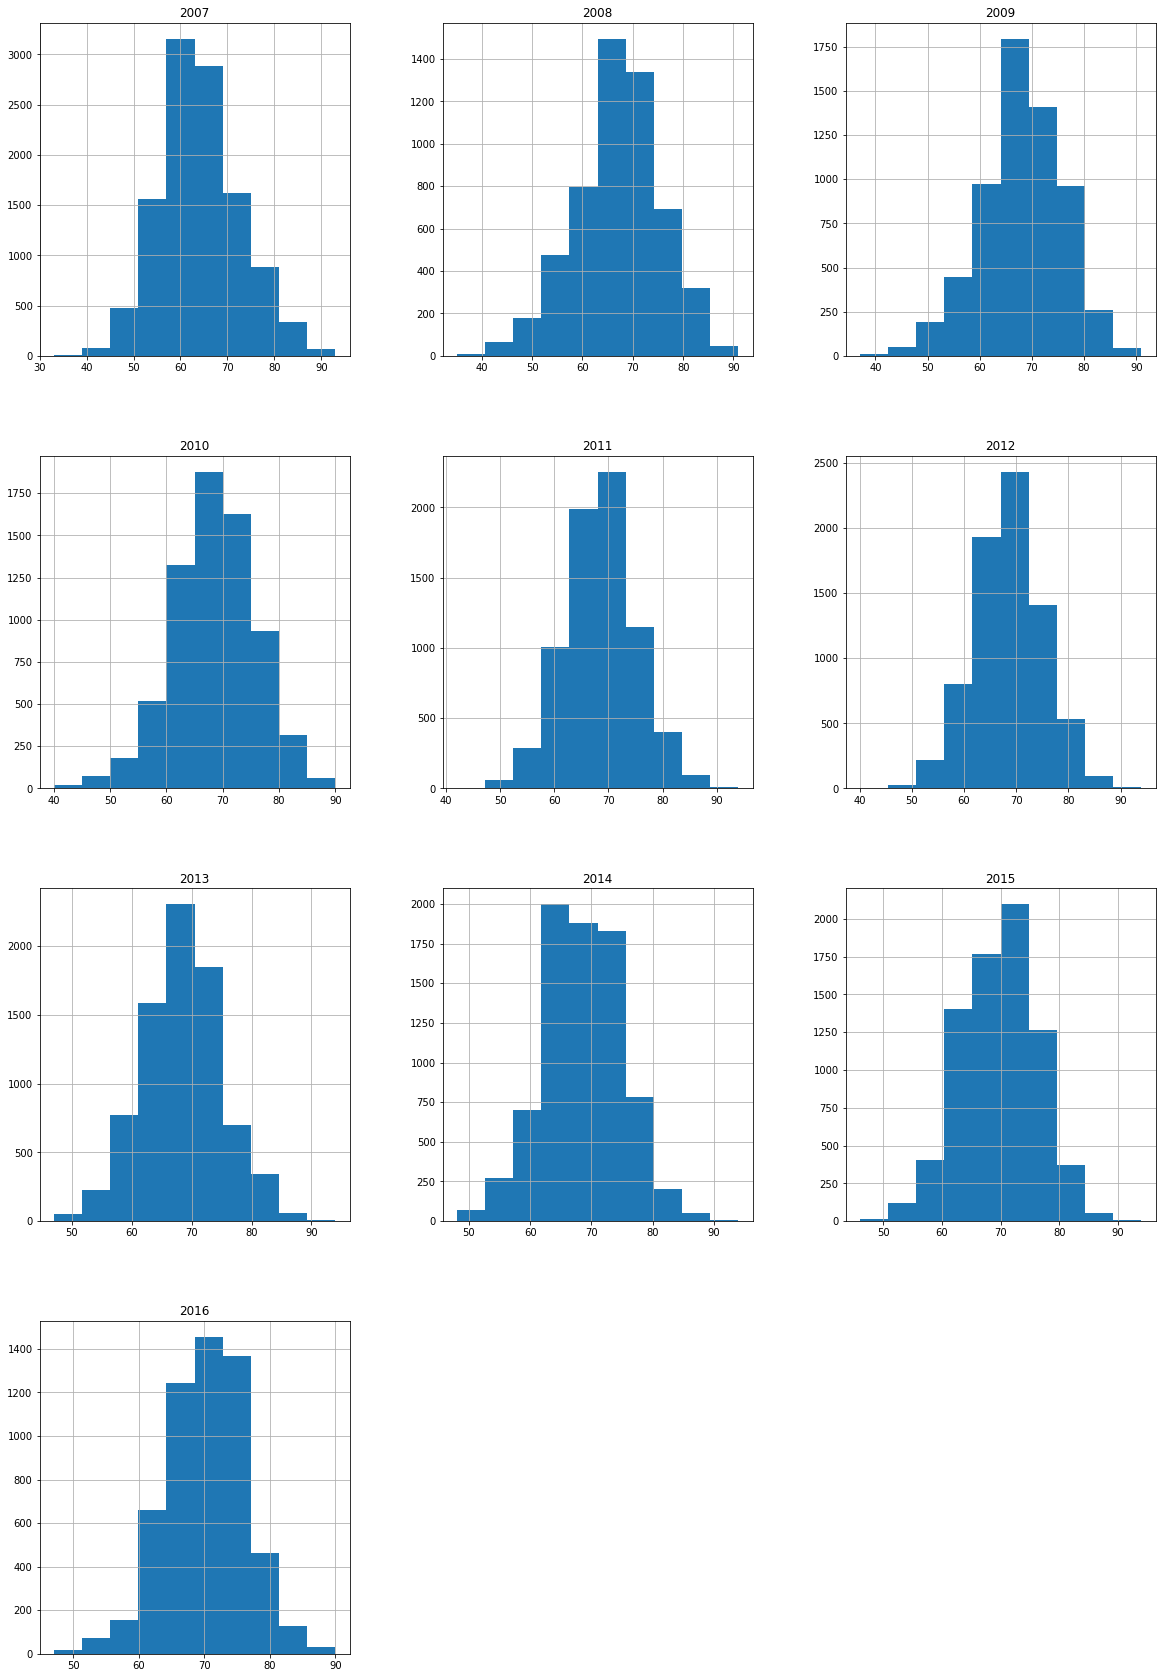

In [10]:
player_ratings = player_atr_df.groupby(['player_api_id','year'])['overall_rating'].max().unstack()
player_ratings.hist(figsize=(20,30));

In [11]:
player_ratings.count()

year
2007    11060
2008     5422
2009     6147
2010     6930
2011     7261
2012     7459
2013     7896
2014     7796
2015     7502
2016     5586
dtype: int64

> **Conclusions**: from the above graphs it is not very clear how does the number of good players change especially since the number of ratings each year is different, so further analysis is needed
- only 2007 has ratings for all of the players in the study while other years have much less values

Text(0.5,0,'year')

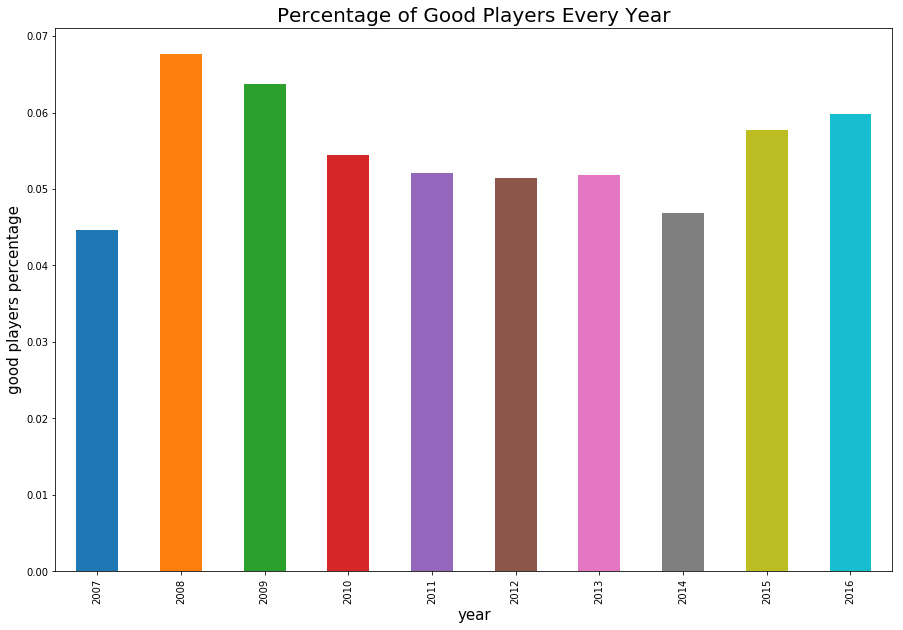

In [20]:
good_players = player_ratings[ player_ratings>= 80 ].count() / player_ratings.count()
good_players.plot(kind='bar',figsize=(15,10))
plt.title('Percentage of Good Players Every Year',size=20)
plt.ylabel('good players percentage',size=15)
plt.xlabel('year',size=15)

> **Conclusions**: Now it is more clear that the number of good players as a percentage of the total players decrease as the number of players increase as evident by the following:
- year 2007 has the lowest percentage and the highest number of total players
- year 2008 has the highest percentage and the lowest number of total players
- 2016 & 2009 have low number of players and high percentage
- 2010-2013 had similar total number of players and thus similar percentage
- 2015 & 2014 have respectively slightly higher and lower than percetnage compared to 2010-2013 despite similar total number

### How was the future overall rating reflected by the potential from years before ?

In [21]:
player_potentials = player_atr_df.groupby(['player_api_id','year'])['potential'].max().unstack()

#### calculate the error between the max potential & max rating for player
- positive values means potential was more than rating
- negative values means potential was less than rating
- 0 means it was a perfect prediction for the future rating
- the closer the value is to zero the better 

In [22]:
# values are taken relative to the the intial value of rating
initial_rating = player_ratings.iloc[:,0]
player_max_potential = player_potentials.max(axis=1) - initial_rating
player_max_rating = player_ratings.max(axis=1) - initial_rating
error = (player_max_potential - player_max_rating)
tolerance = 3

(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.]),
 <a list of 8 Text yticklabel objects>)

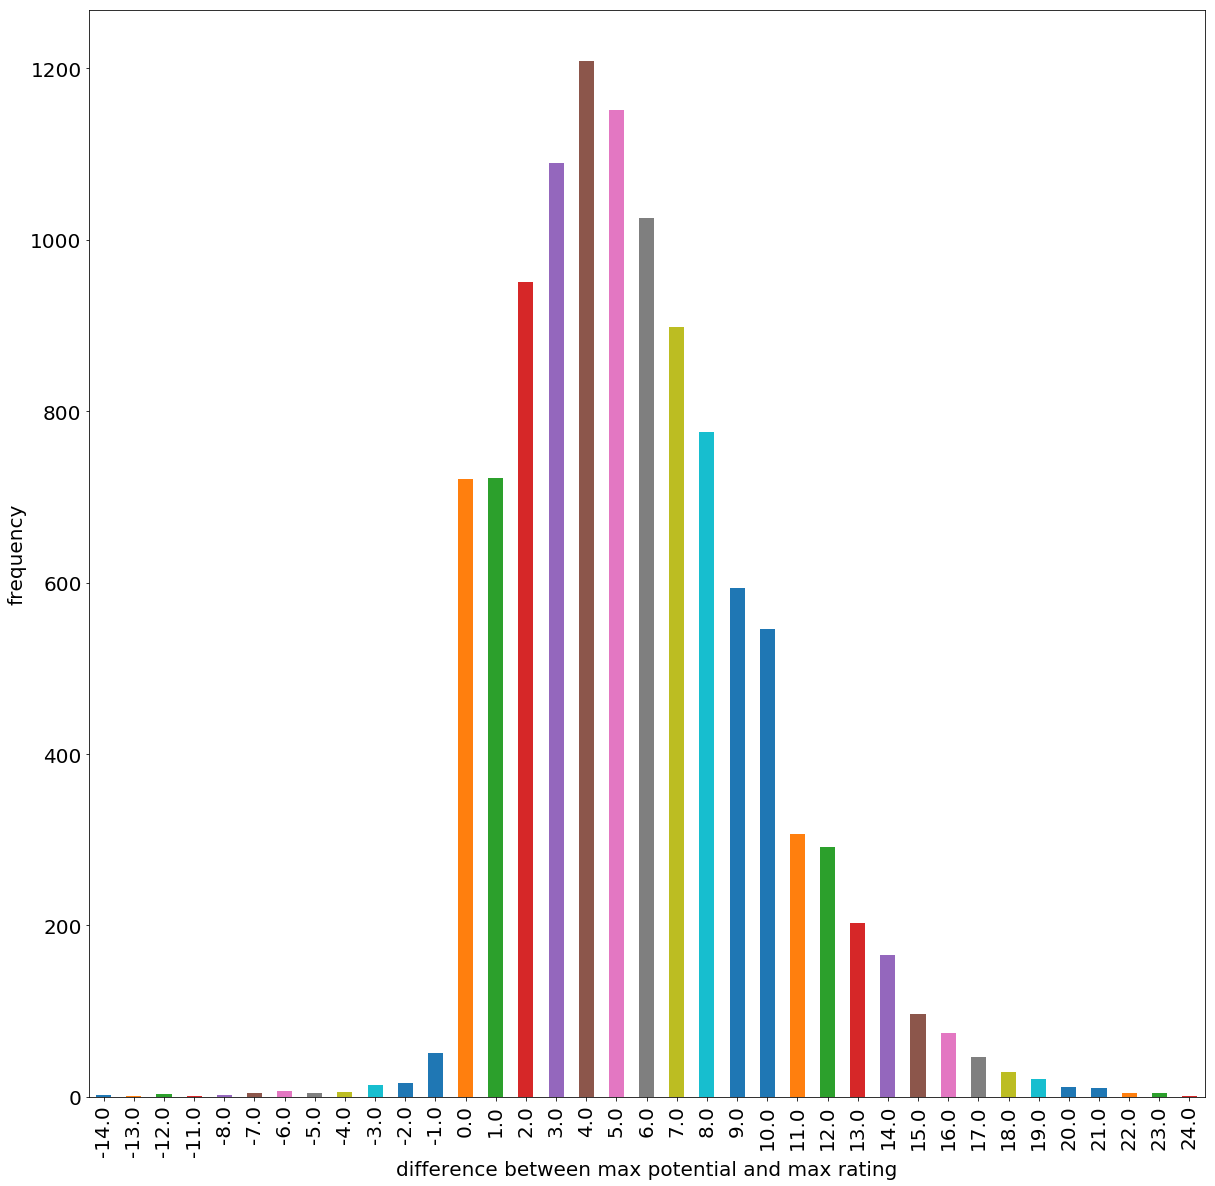

In [23]:
error.value_counts().sort_index().plot(kind = 'bar',figsize=(20,20))
plt.xlabel('difference between max potential and max rating',size = 20)
plt.ylabel('frequency',size= 20)
plt.xticks(size = 20)
plt.yticks(size = 20)

In [24]:
potential_correct_percent = error[(error >=-tolerance )& (error <=tolerance)].count()/error.count()
print(f'The potential relfects the overall rating with {round(potential_correct_percent,3)} accuracy'
      f' with +/- {tolerance} deviation')

The potential relfects the overall rating with 0.322 accuracy with +/- 3 deviation


#### initial rating effect on potetntial


Text(0,0.5,'Error')

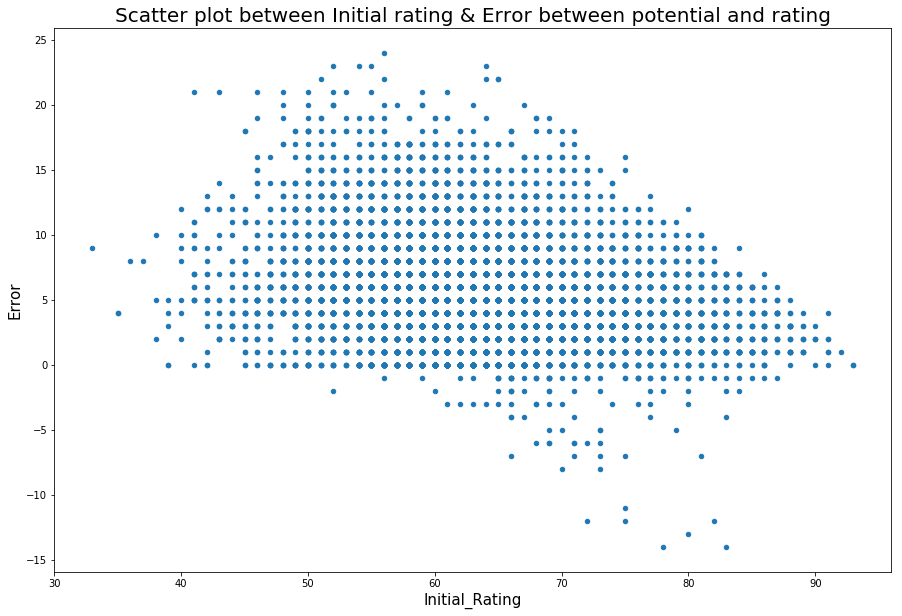

In [30]:
initial_rating_error_df = pd.concat([initial_rating, error], axis=1)
initial_rating_error_df.columns = ['initial_rating','error']
initial_rating_error_df.plot(x='initial_rating', y='error',kind='scatter',figsize=(15,10))
plt.title('Scatter plot between Initial rating & Error between potential and rating',size=20)
plt.xlabel('Initial_Rating',size=15)
plt.ylabel('Error',size=15)

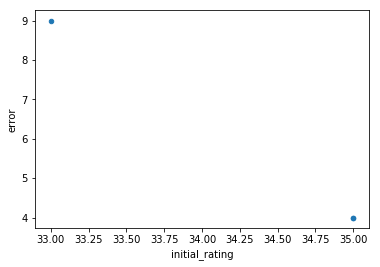

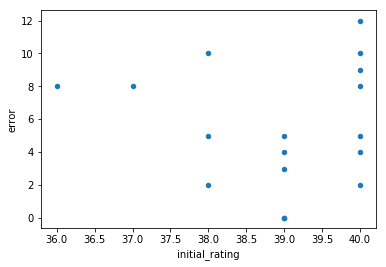

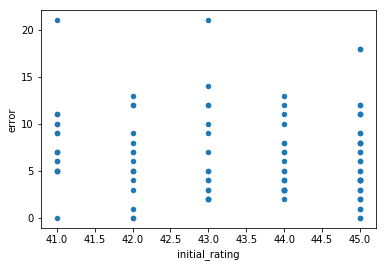

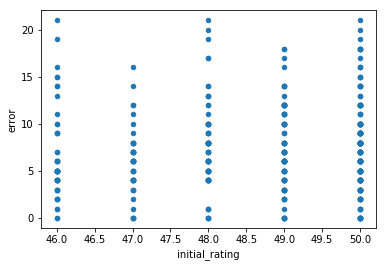

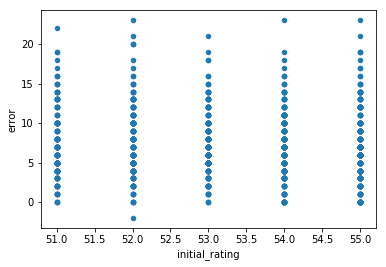

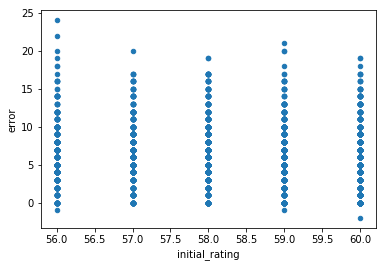

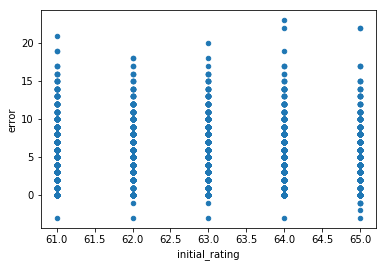

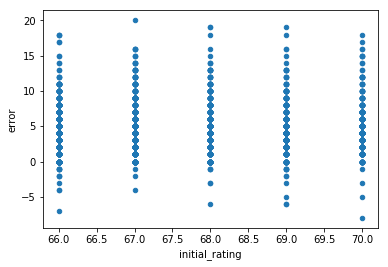

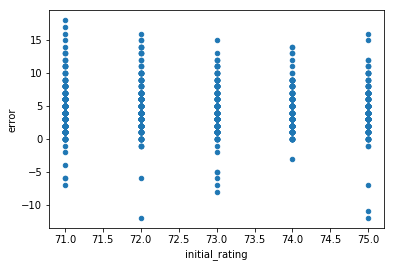

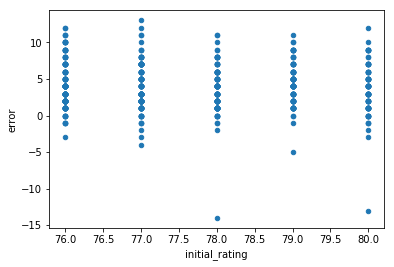

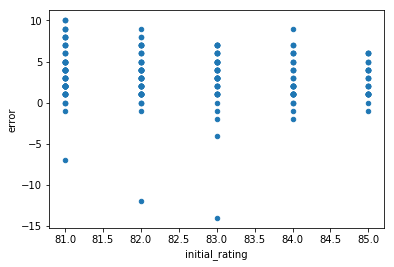

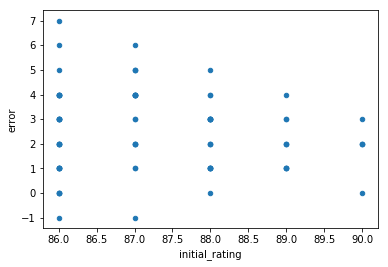

In [31]:
#initial_rating_error_df.boxplot(by='initial_rating',figsize=(80,80))
#plt.xticks(size = 50)
#plt.yticks(size = 50)
classes = 12
lower_boundary = 30
for i in range(classes):
    upper_boundary = 35+(5*i)
    initial_rating_error_df.query('initial_rating > @lower_boundary and initial_rating <= @upper_boundary ').plot(x='initial_rating', y='error', kind='scatter')
    lower_boundary += 5

In [32]:
initial_rating.corr(error)

-0.26841695217452566

> **Conclusions**
- potential is correct in precidcting future ratings approximately 1 in every 3 times with toelrance +/- 3
- the initial value of the rating doesn't have a big effect on the impact of potential which means star players as well as bad players all still have more potetntial

## Team & League Analysis
### Who are the top 20 teams and in what leagues?


In [33]:
home_team_points = match_df.groupby('home_team_api_id')['home_team_points'].sum().sort_index()
away_team_points = match_df.groupby('away_team_api_id')['away_team_points'].sum().sort_index()
# checking if they both have the same number of teams, which should be 299, and in the same order 
print(len(home_team_points) == len(away_team_points),len(home_team_points),home_team_points.index==away_team_points.index)

True 299 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True

In [34]:
team_points = home_team_points + away_team_points
#team_points_df = pd.DataFrame({'team_api_id':team_points.index,'points':team_points})
team_points = team_points.reset_index()
team_points.columns = ['team_api_id','points']
team_points= team_df.merge(team_points).sort_values('points',ascending=False).reset_index(drop=True)
columns = ['team_long_name','points','team_api_id','country_id']
top_20_teams = team_points.loc[0:19,columns]
top_20_teams

,team_long_name,points,team_api_id,country_id
0,FC Barcelona,745,8634,21518
1,Real Madrid CF,720,8633,21518
2,Celtic,704,9925,19694
3,Manchester United,633,10260,1729
4,Juventus,633,9885,10257
5,FC Bayern Munich,623,9823,7809
6,FC Basel,604,9931,24558
7,Ajax,602,8593,13274
8,Paris Saint-Germain,601,9847,4769
9,Chelsea,598,8455,1729


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.]),
 <a list of 9 Text yticklabel objects>)

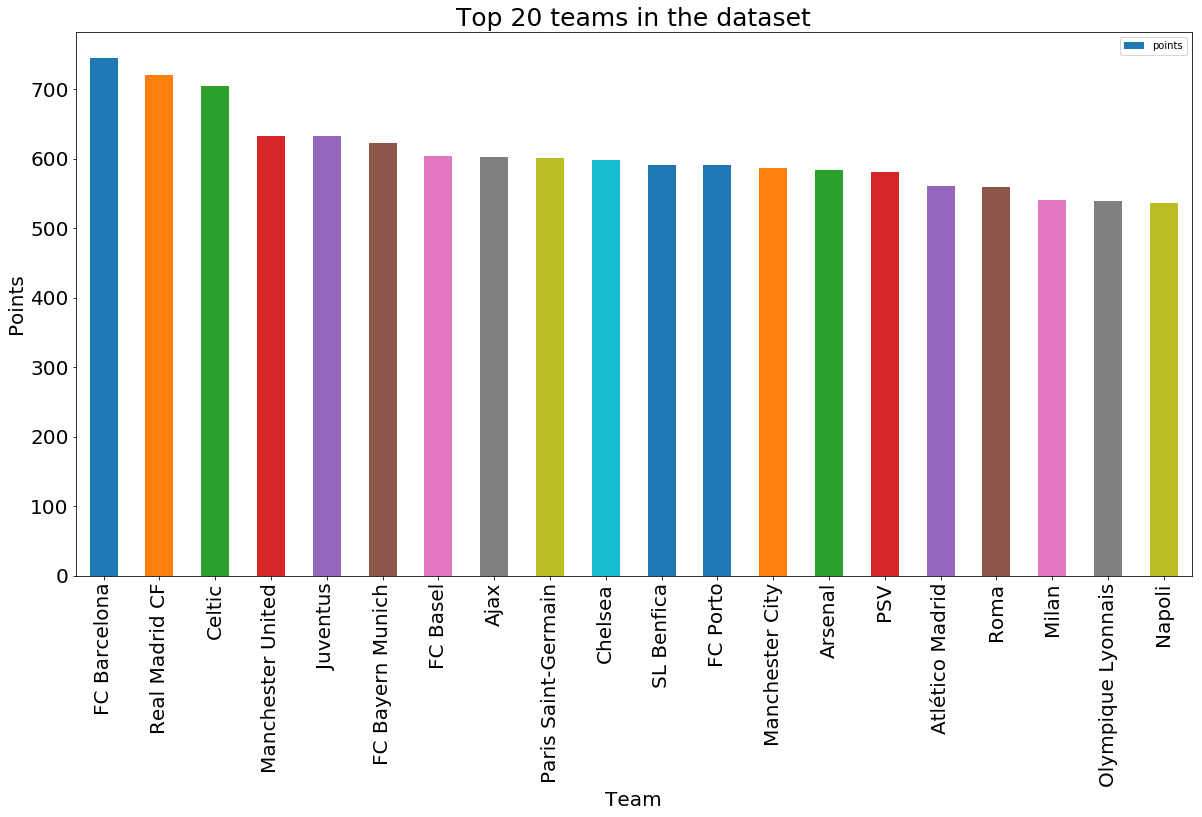

In [37]:
top_20_teams.plot(x='team_long_name',y='points',kind='bar',figsize=(20,10))
plt.title('Top 20 teams in the dataset',size = 25)
plt.xlabel('Team',size = 20)
plt.ylabel('Points',size= 20)
plt.xticks(size = 20)
plt.yticks(size = 20)

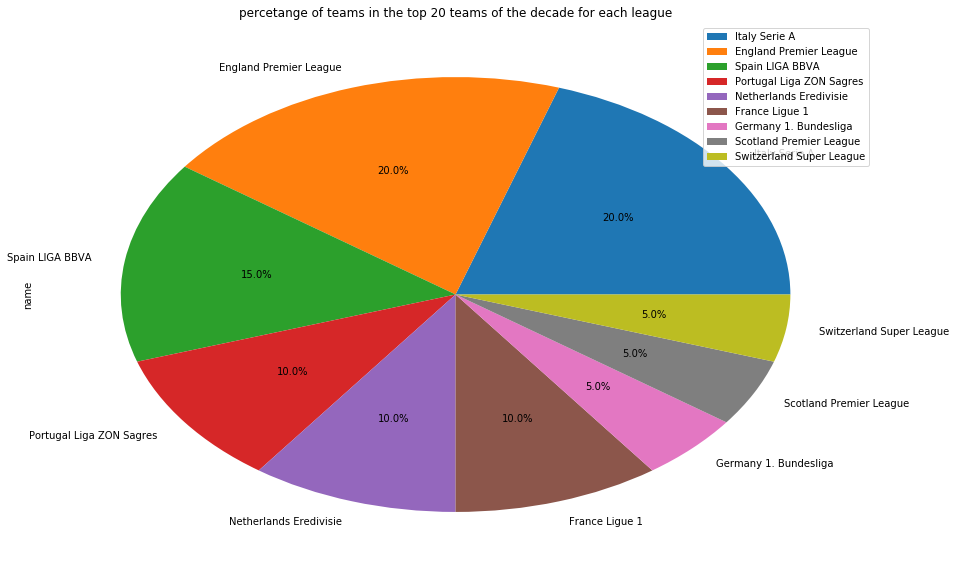

In [38]:
top_20_teams.merge(league_df).name.value_counts().plot(kind='pie',figsize=(15,10),autopct='%1.1f%%')
plt.title('percetange of teams in the top 20 teams of the decade for each league')
plt.legend()
#top_20_teams.country_id.value_counts().plot(kind='pie')

> **Conclusions**
- Barcelona,Real Madrid and Celtic are the only teams with over 700 total points 
- Serie A and Premiere leagues are the leagues with the most clubs in the top 20 each 4 clubs, followed by la liga and Ligue 1 with 3,2 respectively
- despite the bundesliga considered one of the top league only bayern munich is present in the top 20 teams
- other teams are from other countries and relatively have easier leagues such as the Liga ZON Sagres & Eredivisie

### Which leagues are the most intersting to watch/follow?

In [39]:
league_goals = match_df.groupby('country_id')['total_goals'].sum()
league_goals = league_goals.sort_values(ascending=False).reset_index().merge(league_df)
league_goals

,country_id,total_goals,id,name
0,21518,8412,21518,Spain LIGA BBVA
1,1729,8240,1729,England Premier League
2,10257,7895,10257,Italy Serie A
3,13274,7542,13274,Netherlands Eredivisie
4,4769,7427,4769,France Ligue 1
5,7809,7103,7809,Germany 1. Bundesliga
6,17642,5201,17642,Portugal Liga ZON Sagres
7,1,4841,1,Belgium Jupiler League
8,19694,4804,19694,Scotland Premier League
9,15722,4656,15722,Poland Ekstraklasa


(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000.]), <a list of 10 Text yticklabel objects>)

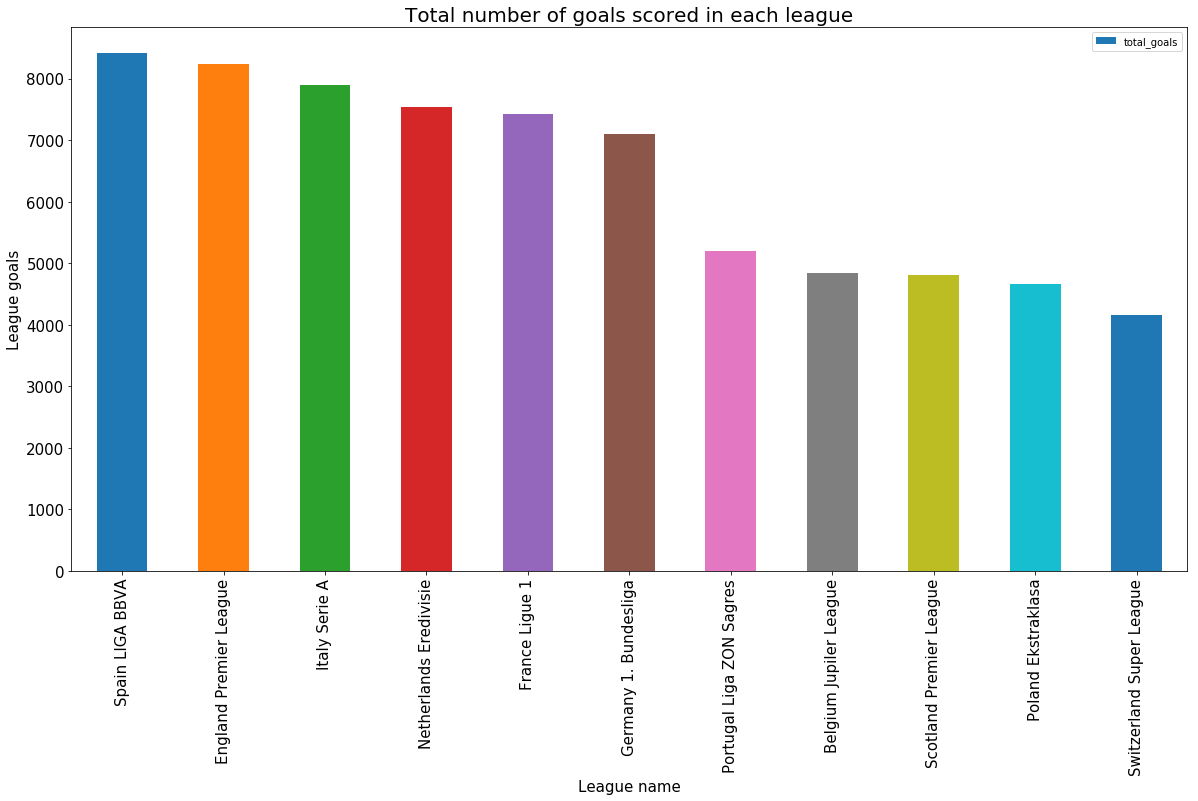

In [44]:
league_goals.plot(x='name',y='total_goals',kind='bar',figsize=(20,10))
plt.title('Total number of goals scored in each league',size=20)
plt.xlabel('League name', size=15)
plt.ylabel('League goals', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

> **Conclusions** as expected the leagues with more teams in the top 20 teams are also the league which have more goals in thier matches
- Premiere league and La Liga are the top leagues to watch with over 8000 goals each over the study period
- Following closely after is series A & surprisingly the Eredivisie league is also a big contender for total nubmer of goals as both have over 7500 goals
- Bundesligue & Ligue 1 have also have high number of goals more than 7000 
- the other leagues are much weaker leagues with the highest of them having no more than 1 club in the top 20 and no more than 5200 goals 

<a id='conc'></a>
## Conclusions

> Based on the analysis above:
- The percentage of good players decrease as the total number of players increase
- The potential value reflects the future prosepcts of youths with apoximately 33 % accuracy 
- Most of the top 20 teams in this period are in La Liga, Series A or Premiure League and they are also the most intersting leagues to follow as they have the highest number of goals
- Other leagues in general other than League 1 and Bundesliguea have fewer goals (except Eredivisie) and less teams in the top 20 (except Liga ZOS Sagres)

## Limitations

> Limitations imposed by this dataset
- dataset is only between 2008-2016 and may not generalise well to other periods of time
- there are alot of missing values for the players data as well as the match data
- the ratings of the players and the teams are not facts but are calculated based on fifa's api which maynot reflect reality with the best accuracy
- critical inforamtion about players and teams are missing such as team budgets and players salary which can have an impact on the analysis in this study

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0